In [ ]:
import time as tm
import random as rnd
import math as m
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.stats as stat2
import seaborn as sns
import pandas as pd 

In [ ]:
#Metódo de polares
N=100

z3=[]
z4=[]

t3=tm.time()
count=0
for i in range(N):
  aceptado=False
  while aceptado==False:
    v1, v2= 2*rnd.random()-1, 2*rnd.random()-1
    s=v1**2+v2**2
    count=+1
    if s<1:
      x= m.sqrt((-2*m.log(s))/s)*v1
      y= m.sqrt((-2*m.log(s))/s)*v2
      z3.append(x)
      z4.append(y)
      aceptado=True
      print(str(x)+" , "+str(y))
t4=tm.time()

t_polar=t4-t3
print("tiempo de ejecución "+ str(t_polar))
print(str(N) + " valores de la primera normal estándar")
print(z3)
print(str(N) + " valores de la segunda normal estándar")
print(z4)

Se utiliza distribución normal para la prueba de pearson

# Prueba de bondad de ajuste (Prueba de pearson)

In [ ]:
categorias = round(1 + (m.log(len(z3)))/(m.log(2))) # Numero de categorias
maximo = max( z3 ) # Numero maximo de la lista generada
print( 'Categorias: {}'.format( maximo ) )

observados, bins = np.histogram( z3, categorias )
print( 'Observados: ', observados )
print( 'Bins: ', bins )


probs = stat2.norm.cdf(bins) # Funcion de distribucion (cdf)

print( 'Probs', probs )

P = []
for k in range( 1, categorias+1 ):
    cc = probs[k] - probs[k-1]
    P.append( cc )

print( 'P:', P )
print( 'Longitud P:', len(P) )

PROBS = np.array(P)
esperados = PROBS * len( z3 )
print( 'Esperados: ', esperados )
print( 'Sumatioria esperados: ', sum(esperados) )
print( 'Sumatoria observados: ', sum(observados) )

est_chi = 0
for k in range( categorias ):
    est_chi = est_chi + ((observados[k] - esperados[k])**2)/esperados[k]
print('est_chi: ', est_chi)

result = stat2.chisquare(observados, esperados, categorias - 2, axis = None )
print('Result.statistic: ', result.statistic)
print(stat2.chi2.cdf(est_chi, categorias - 2))
print(stat2.chi2.cdf(result.statistic, categorias - 2))

Categorias: 2.098979918658159
Observados:  [ 3 11 12 16 18 21 13  6]
Bins:  [-2.55673112 -1.97476724 -1.39280336 -0.81083948 -0.2288756   0.35308828
  0.93505216  1.51701604  2.09897992]
Probs [0.00528304 0.02414728 0.08183963 0.20872893 0.4094828  0.63798887
 0.82511929 0.93536868 0.98209066]
P: [0.018864241326893825, 0.057692346601548025, 0.12688929807613153, 0.20075387317151955, 0.22850606786363098, 0.1871304201686932, 0.1102493927564383, 0.04672198189137067]
Longitud P: 8
Esperados:  [ 1.88642413  5.76923466 12.68892981 20.07538732 22.85060679 18.71304202
 11.02493928  4.67219819]
Sumatioria esperados:  97.68076218562261
Sumatoria observados:  100
est_chi:  8.304962200645756
Result.statistic:  8.304962200645756
0.7833985199050343
0.7833985199050343


Como el valor resultante de la prueba chi-cuadrado dio menor a 0.95 se acepta la hipotesis nula

(array([ 4., 10., 13., 22., 21., 21.,  7.,  2.]),
 array([-2.37548868, -1.78066583, -1.18584297, -0.59102012,  0.00380273,
         0.59862559,  1.19344844,  1.78827129,  2.38309414]),
 <a list of 8 Patch objects>)

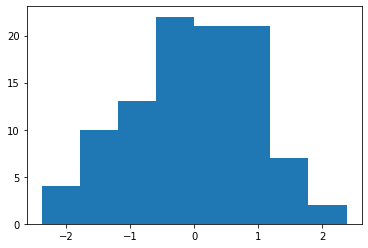

In [ ]:
plt.hist(z3, bins=categorias)

<BarContainer object of 8 artists>

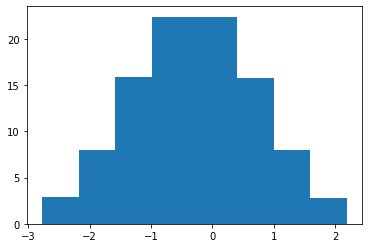

In [ ]:
x=bins[:-1]
plt.bar(x, esperados)